In [1]:
# 0，hmmlearn练习：
import numpy as np
from hmmlearn import hmm
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn.metrics.pairwise import pairwise_distances_argmin
import warnings


def expand(a, b):
    return 1.05*a-0.05*b, 1.05*b-0.05*a

warnings.filterwarnings("ignore")   # hmmlearn(0.2.0) < sklearn(0.18)


np.random.seed(28)
n = 5   # 隐状态数目
n_samples = 500 # 样本数量

pi = np.random.rand(n)
pi /= pi.sum()
print('初始概率：')
print(pi)

A = np.random.rand(n, n)
mask = np.zeros((n, n), dtype=np.bool)
mask[0][1] = mask[0][4] = True
mask[1][0] = mask[1][2] = True
mask[2][1] = mask[2][3] = True
mask[3][2] = mask[3][4] = True
mask[4][0] = mask[4][3] = True
A[mask] = 0
for i in range(n):
    A[i] /= A[i].sum()
print('转移概率:')
print(A)

# 给定均值
means = np.array(((30, 30, 30), (0, 50, 20), (-25, 30, 10),
   (-15, 0, 25), (15, 0, 40)), dtype=np.float)
for i in range(n):
    means[i,:] /= np.sqrt(np.sum(means ** 2, axis=1))[i]
print('均值：')
print(means)

# 给定方差
covars = np.empty((n, 3, 3))
for i in range(n):
    covars[i] = np.diag(np.random.rand(3)*0.02+0.001)    # np.random.rand ∈[0,1)
print('方差：\n')
print(covars)

初始概率：
[0.28102534 0.21635059 0.04817319 0.1532667  0.30118418]
转移概率:
[[0.2202672  0.         0.36791287 0.41181993 0.        ]
 [0.         0.4995834  0.         0.01356202 0.48685458]
 [0.57655791 0.         0.10400763 0.         0.31943446]
 [0.23695178 0.33043766 0.         0.43261056 0.        ]
 [0.         0.58044648 0.15883558 0.         0.26071794]]
均值：
[[ 0.57735027  0.57735027  0.57735027]
 [ 0.          0.92847669  0.37139068]
 [-0.62017367  0.74420841  0.24806947]
 [-0.51449576  0.          0.85749293]
 [ 0.35112344  0.          0.93632918]]
方差：

[[[0.0155071  0.         0.        ]
  [0.         0.02010293 0.        ]
  [0.         0.         0.00246192]]

 [[0.00994326 0.         0.        ]
  [0.         0.01782236 0.        ]
  [0.         0.         0.00391079]]

 [[0.01630543 0.         0.        ]
  [0.         0.0166357  0.        ]
  [0.         0.         0.01450157]]

 [[0.00363404 0.         0.        ]
  [0.         0.00178606 0.        ]
  [0.         0.      

In [2]:
# 1，创建数据：
model = hmm.GaussianHMM(n_components=n, covariance_type='full')
model.startprob_ = pi
model.transmat_ = A
model.means_ = means
model.covars_ = covars
sample, labels = model.sample(n_samples=n_samples, random_state=0)

In [3]:
# 2，模型训练：
model = hmm.GaussianHMM(n_components=n, n_iter=10)
model.fit(sample)
y = model.predict(sample)
np.set_printoptions(suppress=True)
print('##估计初始概率：')
print(model.startprob_)
print('##估计转移概率：')
print(model.transmat_)
print('##估计均值：\n')
print(model.means_)
print('##估计方差：\n')
print(model.covars_)

##估计初始概率：
[0. 0. 1. 0. 0.]
##估计转移概率：
[[0.53070513 0.4517509  0.01754397 0.         0.        ]
 [0.61038015 0.22727271 0.         0.16234714 0.        ]
 [0.31707317 0.         0.48780488 0.         0.19512195]
 [0.         0.39536948 0.         0.11627515 0.48835537]
 [0.         0.         0.48484864 0.39393919 0.12121216]]
##估计均值：

[[-0.00362689  0.92283254  0.37226357]
 [ 0.34487731 -0.0019567   0.93881756]
 [-0.5168573   0.00094903  0.85695108]
 [-0.66622524  0.72555611  0.24211216]
 [ 0.5569746   0.62964009  0.56671171]]
##估计方差：

[[[0.00893011 0.         0.        ]
  [0.         0.01465261 0.        ]
  [0.         0.         0.00340065]]

 [[0.00580409 0.         0.        ]
  [0.         0.0202683  0.        ]
  [0.         0.         0.01309222]]

 [[0.00341816 0.         0.        ]
  [0.         0.00196013 0.        ]
  [0.         0.         0.01525896]]

 [[0.0167428  0.         0.        ]
  [0.         0.01308771 0.        ]
  [0.         0.         0.01618956]]

 [[0.0

In [4]:
# 3，根据类别信息更改顺序
order = pairwise_distances_argmin(means, model.means_, metric='euclidean')
print(order)
pi_hat = model.startprob_[order]
A_hat = model.transmat_[order]
A_hat = A_hat[:, order]
means_hat = model.means_[order]
covars_hat = model.covars_[order]
change = np.empty((n, n_samples), dtype=np.bool)
for i in range(n):
    change[i] = y == order[i]
for i in range(n):
    y[change[i]] = i
print('估计初始概率：')
print(pi_hat)
print('估计转移概率：')
print(A_hat)
print('估计均值：')
print(means_hat)
print('估计方差：')
print(covars_hat)
print(labels)
print(y)
acc = np.mean(labels == y) * 100
print('准确率：%.2f%%' % acc)

[4 0 3 2 1]
估计初始概率：
[0. 0. 0. 1. 0.]
估计转移概率：
[[0.12121216 0.         0.39393919 0.48484864 0.        ]
 [0.         0.53070513 0.         0.01754397 0.4517509 ]
 [0.48835537 0.         0.11627515 0.         0.39536948]
 [0.19512195 0.31707317 0.         0.48780488 0.        ]
 [0.         0.61038015 0.16234714 0.         0.22727271]]
估计均值：
[[ 0.5569746   0.62964009  0.56671171]
 [-0.00362689  0.92283254  0.37226357]
 [-0.66622524  0.72555611  0.24211216]
 [-0.5168573   0.00094903  0.85695108]
 [ 0.34487731 -0.0019567   0.93881756]]
估计方差：
[[[0.01625934 0.         0.        ]
  [0.         0.01590626 0.        ]
  [0.         0.         0.00207361]]

 [[0.00893011 0.         0.        ]
  [0.         0.01465261 0.        ]
  [0.         0.         0.00340065]]

 [[0.0167428  0.         0.        ]
  [0.         0.01308771 0.        ]
  [0.         0.         0.01618956]]

 [[0.00341816 0.         0.        ]
  [0.         0.00196013 0.        ]
  [0.         0.         0.01525896]]

 [[0

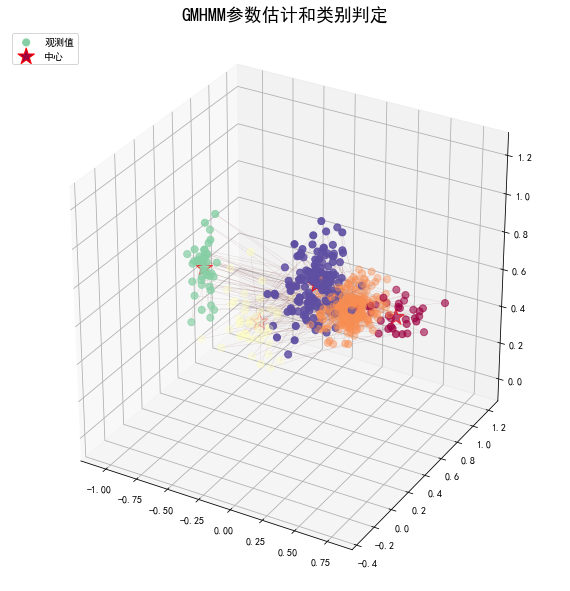

In [5]:
# 4，画图：
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False
fig = plt.figure(figsize=(8, 8), facecolor='w')
ax = fig.add_subplot(111, projection='3d')
colors = plt.cm.Spectral(np.linspace(0,1,n))
ax.scatter(sample[:, 0], sample[:, 1], sample[:, 2], s=50, c=labels, 
      cmap=plt.cm.Spectral, marker='o', label=u'观测值', depthshade=True)
plt.plot(sample[:, 0], sample[:, 1], sample[:, 2], lw=0.1, color='#A07070')
colors = plt.cm.Spectral(np.linspace(0, 1, n))
ax.scatter(means[:, 0], means[:, 1], means[:, 2], s=300, c=colors, 
      edgecolor='r', linewidths=1, marker='*', label=u'中心')

x_min, y_min, z_min = sample.min(axis=0)
x_max, y_max, z_max = sample.max(axis=0)
x_min, x_max = expand(x_min, x_max)
y_min, y_max = expand(y_min, y_max)
z_min, z_max = expand(z_min, z_max)
ax.set_xlim((x_min, x_max))
ax.set_ylim((y_min, y_max))
ax.set_zlim((z_min, z_max))
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout(1)
plt.title(u'GMHMM参数估计和类别判定', fontsize=18)
plt.show()

In [6]:
# 5,股票数据维度信息提取:
import numpy as np
from hmmlearn import hmm
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.metrics.pairwise import pairwise_distances_argmin

import warnings
warnings.filterwarnings("ignore")   # hmmlearn(0.2.0) < sklearn(0.18)

def expand(a, b):
    d = (b - a) * 0.05
    return a-d, b+d

# 5.1,加载数据:
x = np.loadtxt('../DataSets/SH600000.txt', delimiter='\t', skiprows=2, usecols=(4, 5, 6, 2, 3),encoding='ISO-8859-1')  # 0日期  1开盘  2最高  3最低  4收盘  5成交量  6成交额
close_price = x[:, 0]
volumn = x[:, 1]
amount = x[:, 2]
amplitude_price = x[:, 3] - x[:, 4] # 每天的最高价与最低价的差
diff_price = np.diff(close_price)   # 涨跌值
volumn = volumn[1:]                 # 成交量
amount = amount[1:]                 # 成交额
amplitude_price = amplitude_price[1:]   # 每日振幅
sample = np.column_stack((diff_price, volumn, amount, amplitude_price))    # 观测值

In [7]:
# 5.2，模型训练：
n = 5
model = hmm.GaussianHMM(n_components=n, covariance_type='full')
model.fit(sample)
y = model.predict_proba(sample)
print(y)
print(model.predict(sample))

[[0.         0.         0.99999998 0.         0.00000002]
 [0.         0.00014736 0.99736596 0.00016144 0.00232524]
 [0.         0.00002934 0.98987647 0.00920088 0.00089331]
 ...
 [0.         0.         0.01330361 0.98669635 0.00000004]
 [0.00066113 0.         0.00070472 0.99863347 0.00000068]
 [0.00000844 0.00000047 0.00671037 0.99321688 0.00006384]]
[2 2 2 ... 3 3 3]


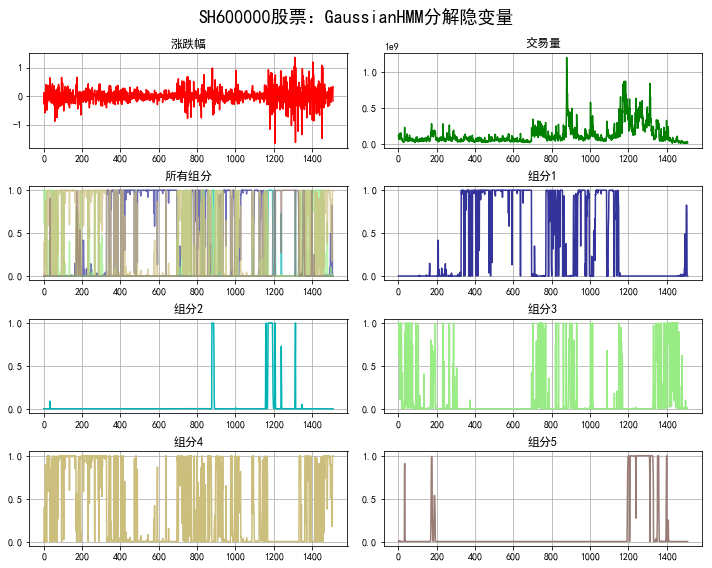

In [8]:
# 5.3，画图：
t = np.arange(len(diff_price))
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(10,8), facecolor='w')
plt.subplot(421)
plt.plot(t, diff_price, 'r-')
plt.grid(True)
plt.title(u'涨跌幅')
plt.subplot(422)
plt.plot(t, volumn, 'g-')
plt.grid(True)
plt.title(u'交易量')

clrs = plt.cm.terrain(np.linspace(0, 0.8, n))
plt.subplot(423)
for i, clr in enumerate(clrs):
    plt.plot(t, y[:, i], '-', color=clr, alpha=0.7)
plt.title(u'所有组分')
plt.grid(True)
for i, clr in enumerate(clrs):
    axes = plt.subplot(4, 2, i+4)
    plt.plot(t, y[:, i], '-', color=clr)
    plt.title(u'组分%d' % (i+1))
    plt.grid(True)
plt.suptitle(u'SH600000股票：GaussianHMM分解隐变量', fontsize=18)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

In [9]:
print(len(sample))
print(len(y))

1510
1510
